In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

alpha = 0.1

def exp_smth(dat, p_cal):
    p_cal = p_cal + alpha*(dat - p_cal)
    return(p_cal)

df1C = pd.read_csv(r'D:\Python\Battery charger\data\Charging data\DATA_RD41.txt')
df0C5 = pd.read_csv(r"D:\Python\Battery charger\data\Charging data\DATA_RD39.txt")
dffh = pd.read_csv(r"D:\Python\Battery charger\data\Charging data\DATA_RD43.txt")
dfsh = pd.read_csv(r"D:\Python\Battery charger\data\Charging data\DATA_RD44.txt")
#print(df0C5.head())
#print(df1C.head())
print(dffh.head())
print(dfsh.head())

  TIME(hr:min:sec)  INPUT_I(A)  CHARGING_I(A)  BUCK_I(V)  Cell1(V)  Cell2(V)  \
0         00:00:01       0.040          0.009       0.06      3.67      7.27   
1         00:00:02       0.390          0.456       1.83      3.75      7.39   
2         00:00:03       0.395          0.459       1.87      3.75      7.38   
3         00:00:04       0.392          0.458       1.84      3.75      7.38   
4         00:00:05       0.396          0.461       1.88      3.75      7.39   

   V_+(V)  TEMPERATURE(deg C)  
0   11.01               28.05  
1   11.16               27.54  
2   11.16               27.65  
3   11.16               27.49  
4   11.17               27.47  
  TIME(hr:min:sec)  INPUT_I(A)  CHARGING_I(A)  BUCK_I(V)  Cell1(V)  Cell2(V)  \
0         00:00:01       0.038          0.009       0.06      3.93      7.72   
1         00:00:02       0.038          0.009       0.06      3.93      7.72   
2         00:00:03       0.541          0.600       2.91      4.03      7.85   
3      

In [2]:
row2cpy = 0
for i in range(20):
    if df1C['CHARGING_I(A)'].iloc[i] < 0.01:
        row2cpy = row2cpy + 1

init1C = df1C.loc[0:row2cpy-1]
df1C.drop([0,row2cpy-1], inplace = True)

row2cpy = 0
for i in range(20):
    if df0C5['CHARGING_I(A)'].iloc[i] < 0.01:
        row2cpy = row2cpy + 1
init0C5 = df0C5.loc[0:row2cpy-1]
df0C5.drop([0,row2cpy-1], inplace = True)

row2cpy = 0
for i in range(20):
    if dfsh['CHARGING_I(A)'].iloc[i] < 0.01:
        row2cpy = row2cpy + 1
dfsh.drop([0,row2cpy-1], inplace = True)

row2cpy = 0
for i in range(20):
    if dffh['CHARGING_I(A)'].iloc[i] < 0.01:
        row2cpy = row2cpy + 1
dffh.drop([0,row2cpy-1], inplace = True)

print(dffh.head())
print(dfsh.head())

  TIME(hr:min:sec)  INPUT_I(A)  CHARGING_I(A)  BUCK_I(V)  Cell1(V)  Cell2(V)  \
1         00:00:02       0.390          0.456       1.83      3.75      7.39   
2         00:00:03       0.395          0.459       1.87      3.75      7.38   
3         00:00:04       0.392          0.458       1.84      3.75      7.38   
4         00:00:05       0.396          0.461       1.88      3.75      7.39   
5         00:00:06       0.394          0.461       1.86      3.75      7.38   

   V_+(V)  TEMPERATURE(deg C)  
1   11.16               27.54  
2   11.16               27.65  
3   11.16               27.49  
4   11.17               27.47  
5   11.16               27.51  
  TIME(hr:min:sec)  INPUT_I(A)  CHARGING_I(A)  BUCK_I(V)  Cell1(V)  Cell2(V)  \
2         00:00:03       0.541          0.600       2.91      4.03      7.85   
3         00:00:04       0.541          0.601       2.91      4.03      7.85   
4         00:00:05       0.540          0.599       2.91      4.03      7.85   
5      

In [3]:
frames = [dffh, dfsh]
dfC = pd.concat(frames)
print(dfC[5161:5170])

   TIME(hr:min:sec)  INPUT_I(A)  CHARGING_I(A)  BUCK_I(V)  Cell1(V)  Cell2(V)  \
4          00:00:05       0.540          0.599       2.91      4.03      7.85   
5          00:00:06       0.540          0.599       2.91      4.03      2.05   
6          00:00:07       0.540          0.601       2.91      4.03      2.04   
7          00:00:08       0.541          0.600       2.91      4.03      7.85   
8          00:00:09       0.541          0.600       2.91      4.03      7.86   
9          00:00:10       0.540          0.599       2.91      4.03      7.86   
10         00:00:11       0.540          0.600       2.91      4.03      7.86   
11         00:00:12       0.540          0.599       2.91      4.03      7.86   
12         00:00:13       0.540          0.600       2.91      4.03      7.86   

    V_+(V)  TEMPERATURE(deg C)  
4    11.94               24.80  
5    11.94               24.73  
6    11.94               24.74  
7    11.95               24.68  
8    11.95              

In [4]:
time1C = np.arange(1, df1C['TIME(hr:min:sec)'].size+1, 1)
time0C5 = np.arange(1, df0C5['TIME(hr:min:sec)'].size+1, 1)
timequatC = np.arange(1, dfC['TIME(hr:min:sec)'].size+1, 1)
print(dfC)

     TIME(hr:min:sec)  INPUT_I(A)  CHARGING_I(A)  BUCK_I(V)  Cell1(V)  \
1            00:00:02       0.390          0.456       1.83      3.75   
2            00:00:03       0.395          0.459       1.87      3.75   
3            00:00:04       0.392          0.458       1.84      3.75   
4            00:00:05       0.396          0.461       1.88      3.75   
5            00:00:06       0.394          0.461       1.86      3.75   
...               ...         ...            ...        ...       ...   
9226         02:33:47       0.042          0.010       0.05     -0.00   
9227         02:33:48       0.042          0.010       0.05      0.00   
9228         02:33:49       0.042          0.010       0.05     -0.01   
9229         02:33:50       0.042          0.009       0.05     -0.01   
9230         02:33:51       0.042          0.010       0.05     -0.01   

      Cell2(V)  V_+(V)  TEMPERATURE(deg C)  
1         7.39   11.16               27.54  
2         7.38   11.16           

In [5]:
smot_i = []
smot_v = []
smot_tt = []
smot_i.append(df1C['CHARGING_I(A)'].iloc[0])
smot_v.append(df1C['V_+(V)'].iloc[0])
smot_tt.append(df1C['TEMPERATURE(deg C)'].iloc[0])

for i in range(1,df1C['CHARGING_I(A)'].size):
    tm1 = smot_i[i - 1]
    tm1 = exp_smth(df1C['CHARGING_I(A)'].iloc[i], tm1)
    smot_i.append(tm1)

    temp = smot_v[i - 1]
    temp = exp_smth(df1C['V_+(V)'].iloc[i], temp)
    smot_v.append(temp)

    temp = smot_tt[i - 1]
    temp = exp_smth(df1C['TEMPERATURE(deg C)'].iloc[i], temp)
    smot_tt.append(temp)

smot_i = np.array(smot_i)
smot_v = np.array(smot_v)
smot_tt = np.array(smot_tt)

smoth_i = []
smoth_v = []
smot_t = []
smoth_i.append(df0C5['CHARGING_I(A)'].iloc[0])
smoth_v.append(df0C5['V_+(V)'].iloc[0])
smot_t.append(df1C['TEMPERATURE(deg C)'].iloc[0])

for i in range(1,df0C5['CHARGING_I(A)'].size):
    tm1 = smoth_i[i - 1]
    tm1 = exp_smth(df0C5['CHARGING_I(A)'].iloc[i], tm1)
    smoth_i.append(tm1)

    temp = smoth_v[i - 1]
    temp = exp_smth(df0C5['V_+(V)'].iloc[i], temp)
    smoth_v.append(temp)

    temp = smot_t[i - 1]
    temp = exp_smth(df0C5['TEMPERATURE(deg C)'].iloc[i], temp)
    smot_t.append(temp)

smoth_i = np.array(smoth_i)
smoth_v = np.array(smoth_v)
smot_t = np.array(smot_t)

smotQ_i = []
smotQ_v = []
smotQ_t = []
smotQ_i.append(dfC['CHARGING_I(A)'].iloc[0])
smotQ_v.append(dfC['V_+(V)'].iloc[0])
smotQ_t.append(dfC['TEMPERATURE(deg C)'].iloc[0])

for i in range(1,dfC['CHARGING_I(A)'].size):
    tm1 = smotQ_i[i - 1]
    tm1 = exp_smth(dfC['CHARGING_I(A)'].iloc[i], tm1)
    smotQ_i.append(tm1)

    temp = smotQ_v[i - 1]
    temp = exp_smth(dfC['V_+(V)'].iloc[i], temp)
    smotQ_v.append(temp)

    temp = smotQ_t[i - 1]
    temp = exp_smth(dfC['TEMPERATURE(deg C)'].iloc[i], temp)
    smotQ_t.append(temp)

smotQ_i = np.array(smotQ_i)
smotQ_v = np.array(smotQ_v)
smotQ_t = np.array(smotQ_t)

In [6]:
meanI1C = smot_i[:700].mean()
meanV1C = smot_v[700:].mean()
meanI0C5 = smoth_i[:3530].mean()
meanV0C5 = smoth_v[3550:].mean()
meanquatC = smotQ_i[4580:7435].mean()
print(meanI0C5)
print(meanI1C)
print(meanV0C5)
print(meanV1C)

1.1993325653018825
2.424198896759826
12.553733336303626
12.443695289279844


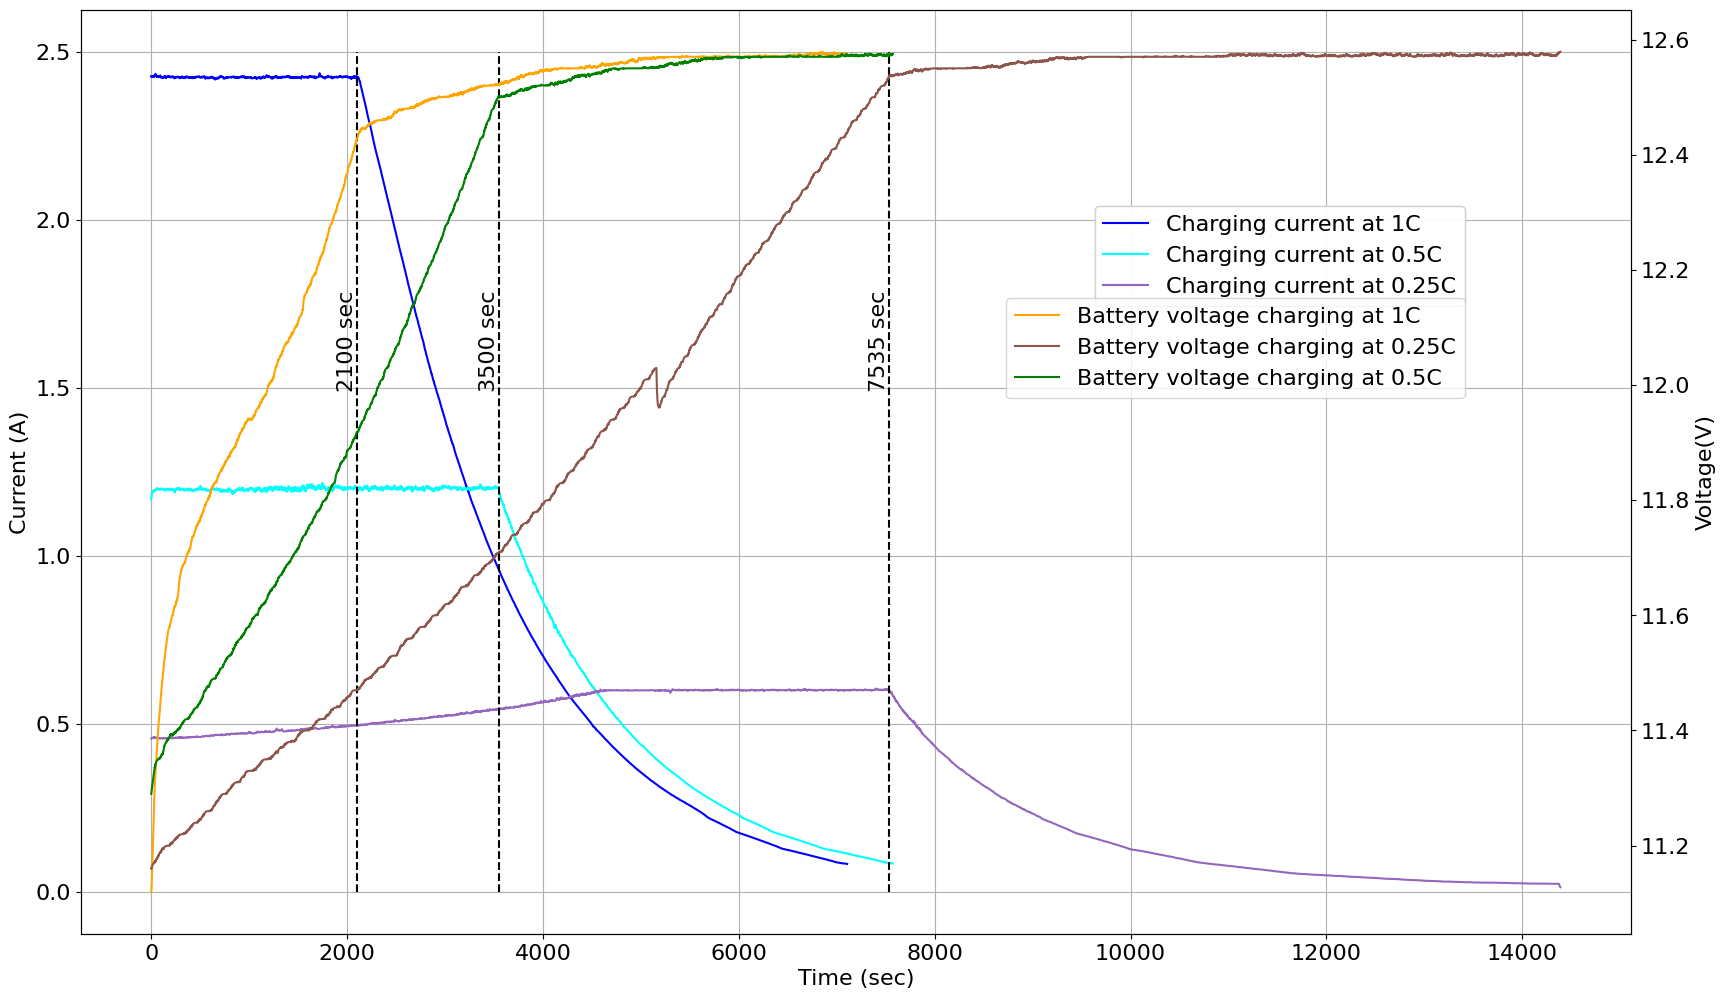

In [7]:
fig, ax = plt.subplots(figsize=(20,12))
p1, = ax.plot(time1C, smot_i, label = 'Charging current at 1C', color = 'blue')
p2, = ax.plot(time0C5, smoth_i, label = 'Charging current at 0.5C', color = 'cyan')
p3, = ax.plot(timequatC, smotQ_i, label = 'Charging current at 0.25C', color = 'Tab:purple')
ax.set_xlabel('Time (sec)', fontsize = 16)
ax.set_ylabel('Current (A)', fontsize = 16)
ax.tick_params(axis='both', which='major', labelsize=16)
#ax.set_yticklabels(fontsize = 16)
#leg1 = ax.legend(handles = [p1, p2, p3], bbox_to_anchor=(0.94, 1.11), fontsize = 16)
leg1 = ax.legend(handles = [p1, p2, p3], bbox_to_anchor=(0.9, 0.8), fontsize = 16)
ax.add_artist(leg1)
ax.grid(True)

#l1, = ax.plot(np.arange(1, 5000+1, 1), np.full(5000, meanI0C5), color = 'red' , ls = '--')
#ax.text(4000, meanI0C5 + 0.01, r'%.3f A'%(meanI0C5), fontsize=16)
#l2, = ax.plot(np.arange(1, 2000+1, 1), np.full(2000, meanI1C), color = 'red', ls = '--')
#ax.text(800, meanI1C + 0.01, r'%.3f A'%(meanI1C), fontsize=16)
#l5, = ax.plot(timequatC, np.full(timequatC.size, meanquatC), color = 'red', ls = '--')
#ax.text(13000, meanquatC + 0.01, r'%.3f A'%(meanquatC), fontsize=16)
l3, = ax.plot(np.full(26, 2100), np.arange(0, 2.6, 0.1), ls = '--', color = 'black')
ax.text(1900, 1.5, r'2100 sec', fontsize=16, rotation='vertical')
l4, = ax.plot(np.full(26, 3550), np.arange(0, 2.6, 0.1), ls = '--', color = 'black')
ax.text(3350, 1.5, r'3500 sec', fontsize=16, rotation='vertical')
l6, = ax.plot(np.full(26, 7535), np.arange(0, 2.6, 0.1), ls = '--', color = 'black')
ax.text(7330, 1.5, r'7535 sec', fontsize=16, rotation='vertical')

vax = ax.twinx()
vax.plot(time1C, smot_v, label = 'Battery voltage charging at 1C', color = 'orange')
vax.plot(timequatC, smotQ_v, label = 'Battery voltage charging at 0.25C', color = 'Tab:brown')
#vax.plot(time1C, np.full(time1C.size, meanV1C), color = 'black', ls = '--')
vax.set_ylabel('Voltage(V)', fontsize = 16)
vax.tick_params(axis='both', which='major', labelsize=16)
vax.plot(time0C5, smoth_v, label = 'Battery voltage charging at 0.5C', color = 'green')
#vax.plot(time0C5, np.full(time0C5.size, meanV05C), color = 'red', ls = '--')
vax.legend(loc='upper right', bbox_to_anchor=(0.9, 0.7), fontsize = 16)

# Get the current reference
#ax = ax.gca()

# Create a Rectangle patch
#rect = patches.Rectangle((5000,12),3200,0.4,linewidth=1,edgecolor='black',facecolor='none')

# Add the patch to the Axes
#ax.add_patch(rect)


#y = 12.35
#ax.text(5050, y, r'Average 1C current = %.3f A'%meanI1C, fontsize=14, color = 'black')
#y -= 0.1
#ax.text(5050, y, r'Average 0.5C current = %.3f A'%meanI1C, fontsize=14, color = 'black')
#y -= 0.1
#ax.text(5050, y, r'1C charging time = 700 sec', fontsize=14, color = 'black')
#y -= 0.1
#ax.text(5050, y, r'0.5C charging time = 3500 sec', fontsize=14, color = 'black')
plt.show()

23
673


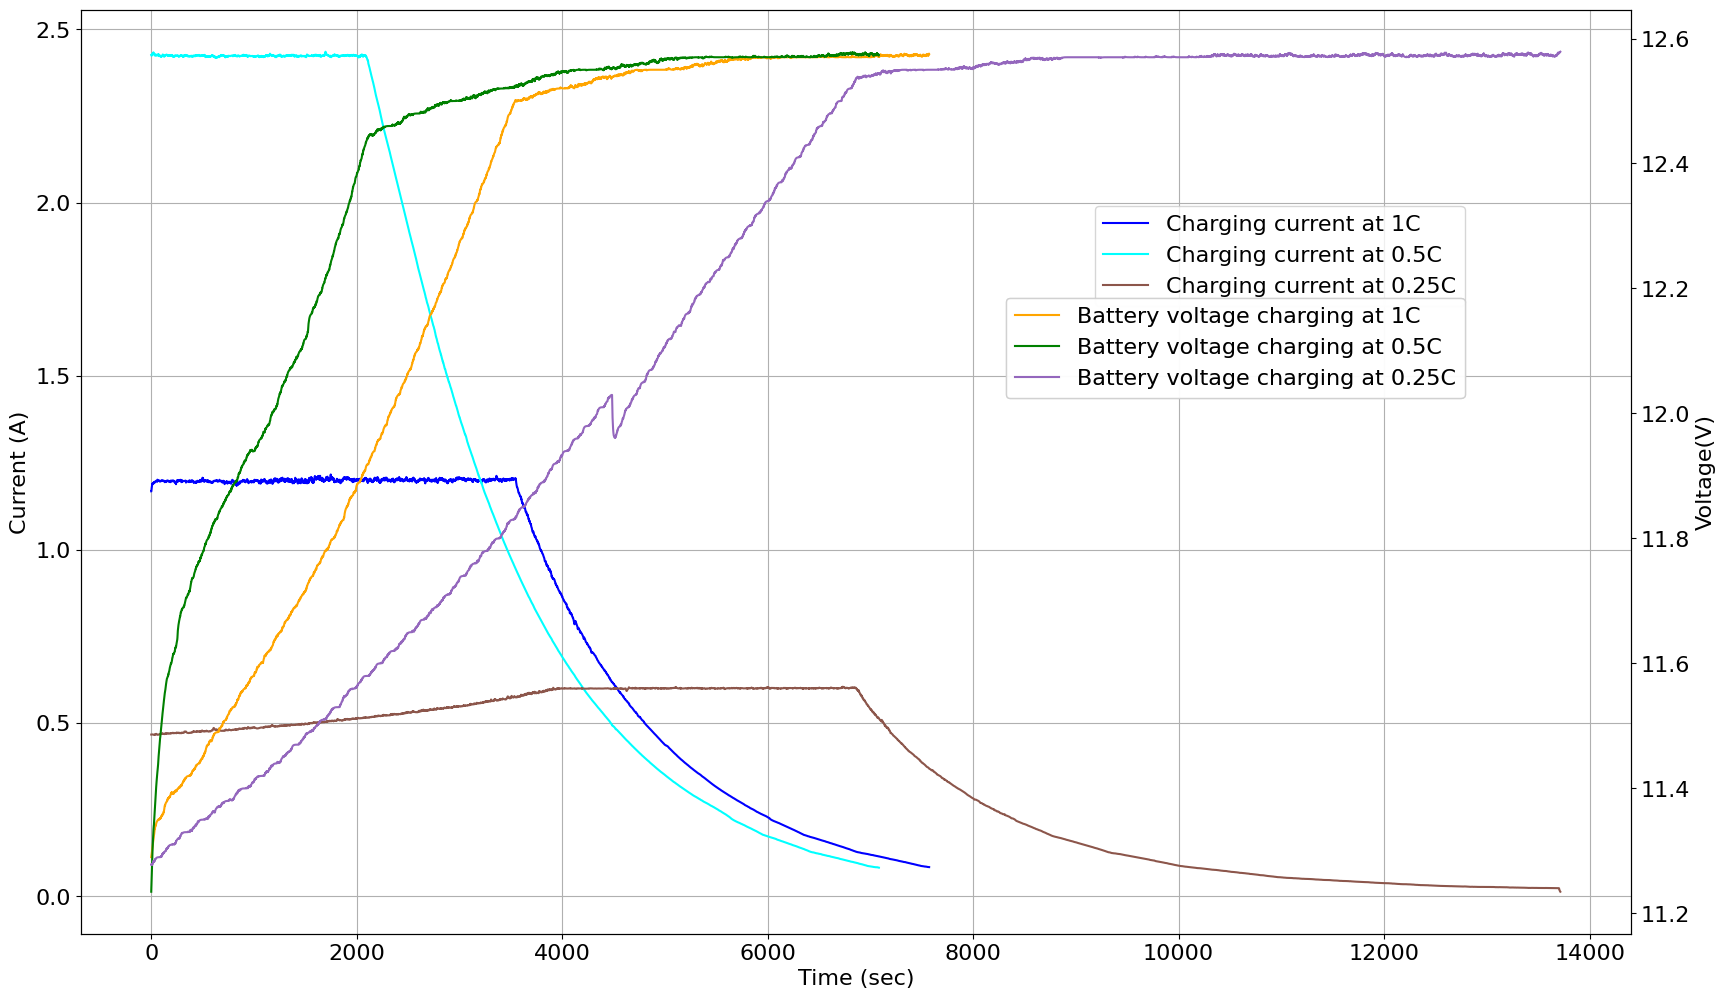

In [8]:
for i in range(df1C.size):
    if df0C5['V_+(V)'].iloc[0] - df1C['V_+(V)'].iloc[i] == 0:
        eqvc = i
        break

for i in range(dfC.size):
    if df0C5['V_+(V)'].iloc[0] - dfC['V_+(V)'].iloc[i] == 0:
        eqvq = i
        break

print(eqvc)
print(eqvq)
eqvt = smot_v[eqvc:]
eqvti = smot_i[eqvc:]

eqvtQ = smotQ_v[eqvq:]
eqvtiQ = smotQ_i[eqvq:]

fig, ax = plt.subplots(figsize=(20,12))
ax.plot(time0C5, smoth_i, label = 'Charging current at 1C', color = 'blue')
ax.plot(np.arange(1, eqvt.size+1, 1), eqvti, label = 'Charging current at 0.5C', color = 'cyan')
ax.plot(np.arange(1, eqvtQ.size+1, 1), eqvtiQ, label = 'Charging current at 0.25C', color = 'tab:brown')
ax.set_xlabel('Time (sec)', fontsize = 16)
ax.set_ylabel('Current (A)', fontsize = 16)
ax.tick_params(axis='both', which='major', labelsize=16)
#ax.set_yticklabels(fontsize = 16)
ax.legend(bbox_to_anchor=(0.9, 0.8), fontsize = 16)

ax.grid(True)

vax = ax.twinx()
p1, = vax.plot(time0C5, smoth_v, label = 'Battery voltage charging at 1C', color = 'orange')
#vax.plot(time1C, np.full(time1C.size, meanV1C), color = 'black', ls = '--')
vax.set_ylabel('Voltage(V)', fontsize = 16)
vax.tick_params(axis='both', which='major', labelsize=16)
#ax.subplot(122)
p2, = vax.plot(np.arange(1, eqvt.size+1, 1), eqvt, label = 'Battery voltage charging at 0.5C', color = 'green')
p3, = vax.plot(np.arange(1, eqvtQ.size+1, 1), eqvtQ, label = 'Battery voltage charging at 0.25C', color = 'Tab:purple')
#vax.plot(time0C5, np.full(time0C5.size, meanV05C), color = 'red', ls = '--')
leg1 = vax.legend(loc='upper right', bbox_to_anchor=(0.9, 0.7), fontsize = 16)
vax.add_artist(leg1)

#l1, = vax.plot(time1C, np.full(time1C.size, eqvt[1380]), color = 'red' , ls = '-.', label = 'Voltage of 1C charging at 700 sec = %.3f V'%eqvt[1380])
#l2, = vax.plot(time1C, np.full(time1C.size, smot_v[700]), color = 'black', ls = '-.', label = 'Voltage of 0.5C charging at 1380 sec = %.3f A'%smot_v[700])
#l3, = vax.plot(np.full(23, 700), np.arange(11.7, 12.8, 0.05), ls = '--', color = 'black', label = 'Constant curent time 1C = 700 sec')
#l4, = vax.plot(np.full(23, 1380), np.arange(11.7, 12.8, 0.05), ls = '--', color = 'red', label = 'Constant curent time 0.5C = 1380 sec')
#vax.legend(handles = [l3, l4, l1, l2], bbox_to_anchor=(0.3, 1.2), fontsize = 16)

plt.show()

7106
2       7.61
3       7.61
4       7.61
5       7.62
6       7.63
        ... 
7103    8.42
7104    8.43
7105    8.42
7106    8.43
7107    8.43
Name: Cell2(V), Length: 7106, dtype: float64
[7.61       7.61       7.61       ... 8.42493579 8.42544221 8.42589799]
4.266401632423306
4.008692220385458
4.090351478601859


C:\Users\Paru\AppData\Local\Temp\ipykernel_6080\2661247766.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c2[i] = c2[i-1]
C:\Users\Paru\AppData\Local\Temp\ipykernel_6080\2661247766.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c2[i] = c2[i-1]
C:\Users\Paru\AppData\Local\Temp\ipykernel_6080\2661247766.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c2[i] = c2[i-1]
C:\Users\Paru\AppData\Local\Temp\ipykernel_6080\2661247766

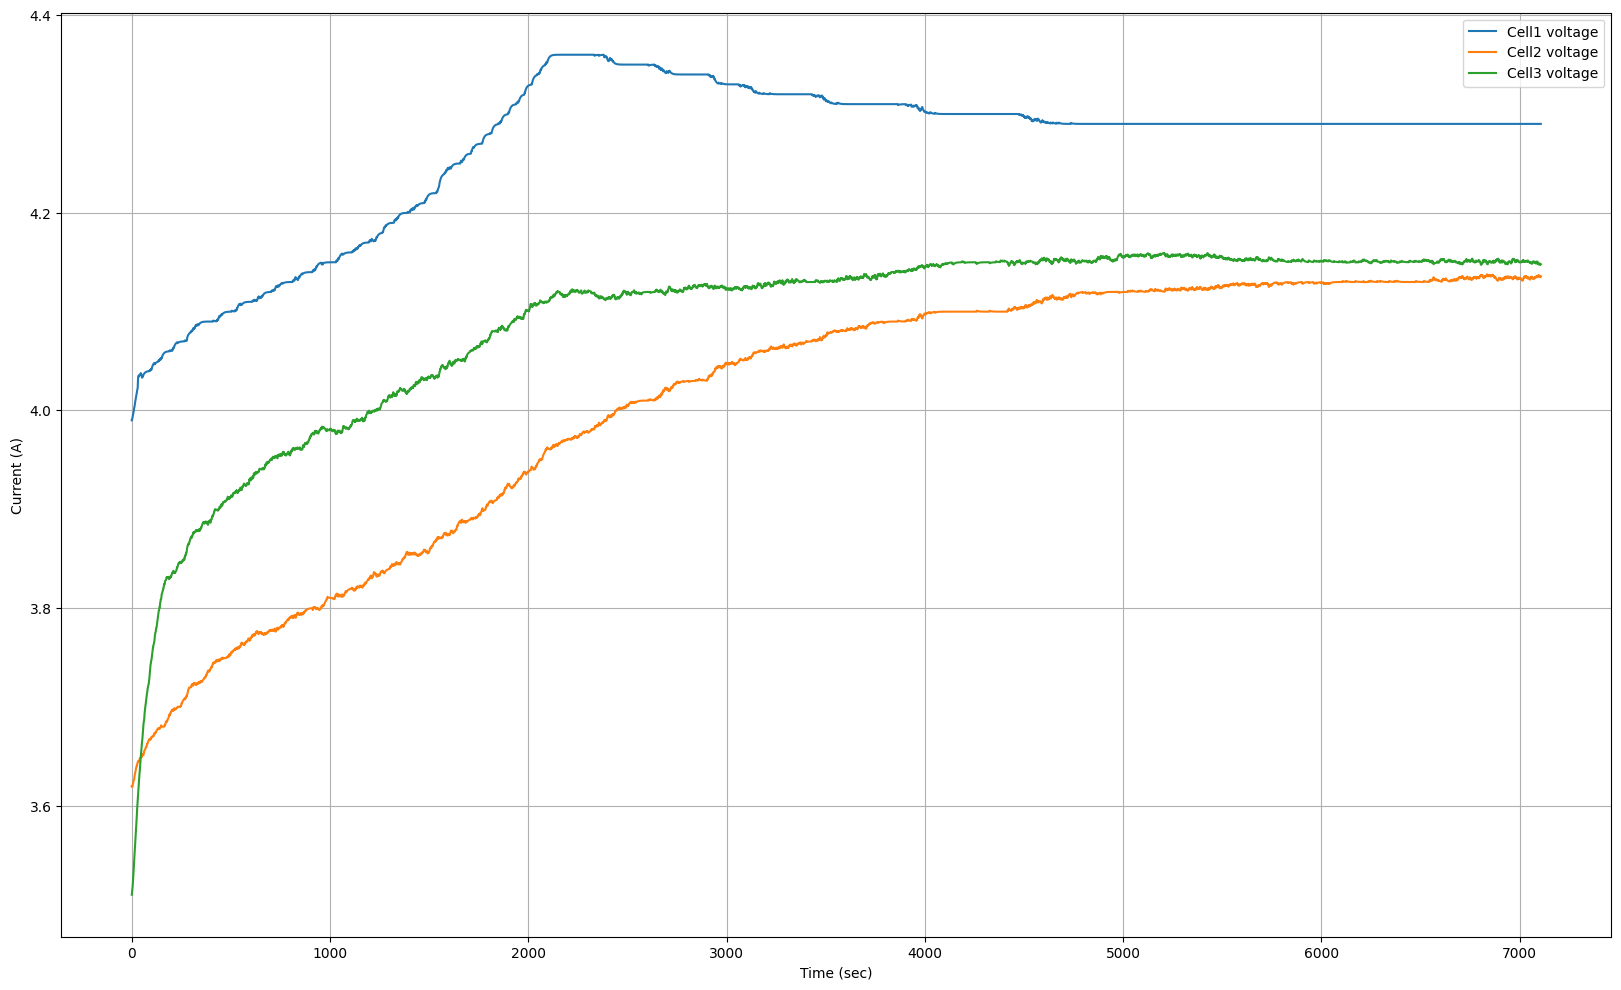

In [9]:
print(time1C.size)

c2 = df1C['Cell2(V)']
print(c2)
for i in range(3,time1C.size):
    if c2[i] < 6 :
        c2[i] = c2[i-1]

smot_c1 = []
smot_c2 = []
smot_c3 = []
smot_c1.append(df1C['Cell1(V)'].iloc[0])
smot_c2.append(c2[2])
smot_c3.append(df1C['V_+(V)'].iloc[0])


for i in range(1,df1C['CHARGING_I(A)'].size):
    tm1 = smot_c1[i - 1]
    tm1 = exp_smth(df1C['Cell1(V)'].iloc[i], tm1)
    smot_c1.append(tm1)

    temp = smot_c2[i- 1]
    temp = exp_smth(c2[i+2], temp)
    smot_c2.append(temp)

    temp = smot_c3[i - 1]
    temp = exp_smth(df1C['V_+(V)'].iloc[i], temp)
    smot_c3.append(temp)

smot_c1 = np.array(smot_c1)
smot_c2 = np.array(smot_c2)
smot_c3 = np.array(smot_c3)

print(smot_c2)
smot_c3 = smot_c3 - smot_c2
smot_c2 = smot_c2 - smot_c1
av1 = smot_c1.mean()
av2 = smot_c2.mean()
av3 = smot_c3.mean()
print(av1)
print(av2)
print(av3)

fig, ax = plt.subplots(figsize=(20,12))        
ax.plot(time1C, smot_c1, label = "Cell1 voltage")
ax.plot(time1C, smot_c2, label = "Cell2 voltage")
ax.plot(time1C, smot_c3, label = "Cell3 voltage")
ax.set_xlabel('Time (sec)')
ax.set_ylabel('Current (A)')
ax.grid(True)
ax.legend()
plt.show()

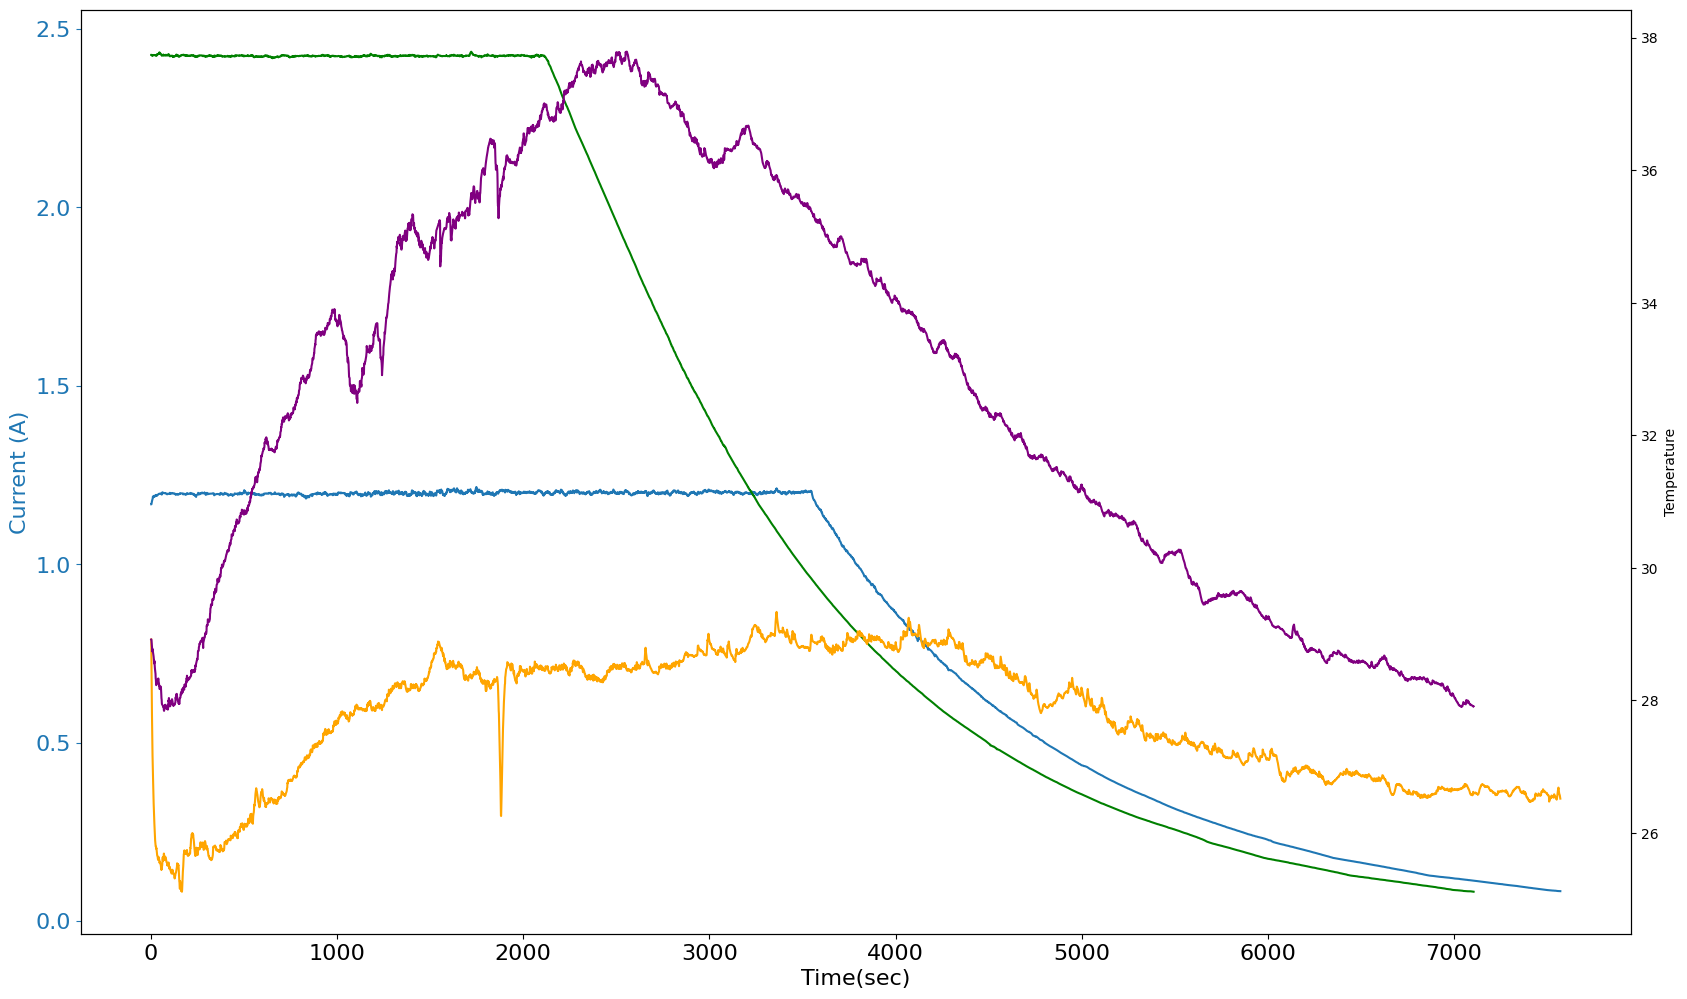

In [58]:
fig, ax = plt.subplots(figsize=(20,12))
ax.plot(time0C5, smoth_i, label = 'Current')
ax.plot(time1C, smot_i, label = 'Current', color = 'green')

ax.set_xlabel('Time(sec)', fontsize = 16)
ax.set_ylabel('Current (A)', fontsize = 16, color = '#1f77b4')
ax.tick_params(axis='y', which='major', labelsize=16, colors = '#1f77b4')
ax.tick_params(axis='x', which='major', labelsize=16)

dplt = plt.twinx()
dplt.plot(time0C5, smot_t, label = 'Temperature', color = 'orange')
dplt.plot(time1C, smot_tt, label = 'Temperature', color = 'purple')

dplt.set_ylabel('Temperature')
plt.show()

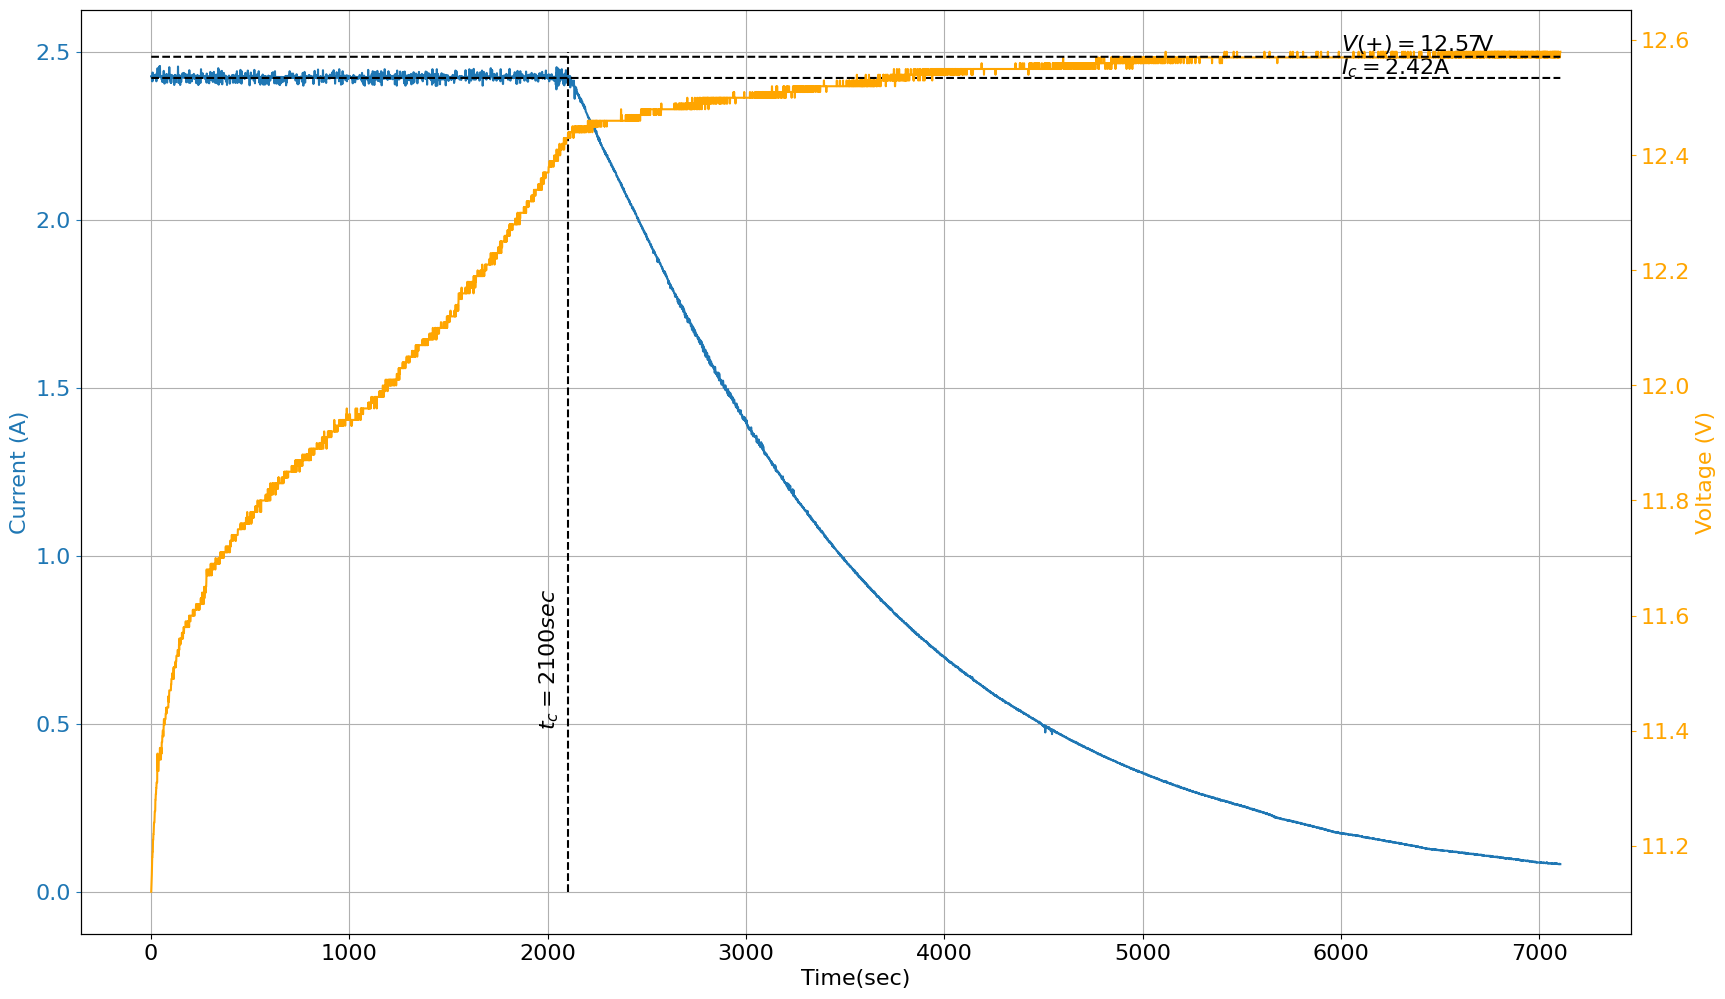

In [56]:
df2 = pd.read_csv(r"D:\Python\Battery charger\data\Charging data\DATA_RD41.txt")

lin_rgn = 2100

meanI = df2['CHARGING_I(A)'].iloc[:lin_rgn].mean()
meanV = df2['V_+(V)'].loc[5000:].mean()

row2cpy = 0
for i in range(20):
    if df2['CHARGING_I(A)'].iloc[i] < 0.01:
        row2cpy = row2cpy + 1

init1C = df2.loc[0:row2cpy-1]
df2.drop([0,row2cpy-1], inplace = True)

time2 = np.arange(1, df2['TIME(hr:min:sec)'].size+1, 1)

fig, ax = plt.subplots(figsize=(20,12))
ax.plot(time2, df2['CHARGING_I(A)'], label = 'Charging current')
ax.plot(time2, np.full(time2.size, meanI), ls = '--', color = 'black')
ax.text(6000, meanI+0.01, r'$I_c = $%.2fA'%(meanI), fontsize = 16)
ax.set_xlabel('Time(sec)', fontsize = 16)
ax.set_ylabel('Current (A)', fontsize = 16, color = '#1f77b4')
ax.tick_params(axis='y', which='major', labelsize=16, colors = '#1f77b4')
ax.tick_params(axis='x', which='major', labelsize=16)
ax.plot(np.full(6, 2100), np.arange(0, 2.6, 0.5), ls = '--', color = 'black')
ax.text(1950, 0.5, r'$t_c = 2100 sec$', fontsize=16, rotation='vertical')
#ax.set_yticklabels(fontsize = 16)
ax.grid(True)
dax = plt.twinx()
dax.plot(time2, df2['V_+(V)'], color = 'orange', label = 'Battery voltage')
dax.plot(time2, np.full(time2.size, meanV), color = 'black', ls = '--')
dax.text(6000, meanV+0.01, r'$V(+) = $%.2fV'%(meanV), fontsize = 16)
dax.set_ylabel('Voltage (V)', fontsize = 16, color = 'orange')
dax.tick_params(axis='y', labelsize=16, colors = 'orange')

plt.show()

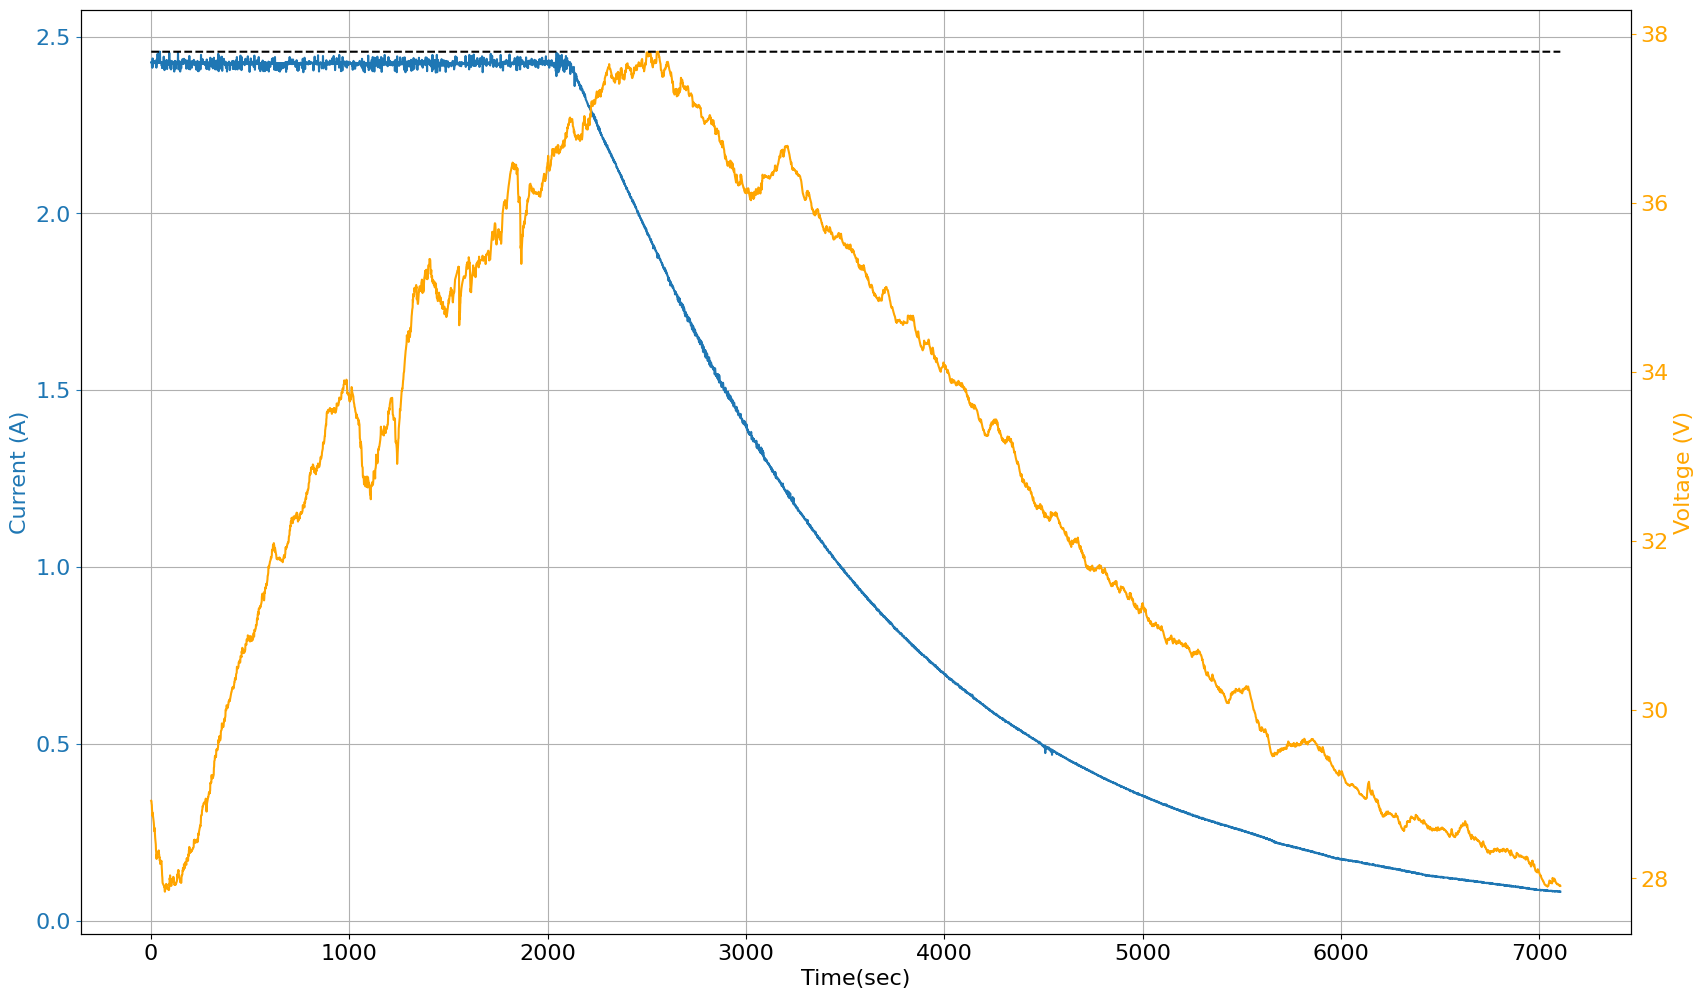

In [57]:
fig, ax = plt.subplots(figsize=(20,12))
maxT = smot_tt.max()
ax.plot(time2, df2['CHARGING_I(A)'])
ax.set_xlabel('Time(sec)', fontsize = 16)
ax.set_ylabel('Current (A)', fontsize = 16, color = '#1f77b4')
ax.tick_params(axis='y', which='major', labelsize=16, colors = '#1f77b4')
ax.tick_params(axis='x', which='major', labelsize=16)
ax.grid(True)
dplt = plt.twinx()
dplt.plot(time2, smot_tt, color = 'orange')
dplt.plot(time2, np.full(time2.size, maxT), color = 'black', ls = '--')
dplt.set_ylabel('Voltage (V)', fontsize = 16, color = 'orange')
dplt.tick_params(axis='y', labelsize=16, colors = 'orange')